# Introduction

Implementing ML Model on the dataset, which is related to sentiment analysis of tweets about airlines. It appears to contain information about tweets posted by users regarding their experiences with various airlines. 

# Importing Libraries

In [87]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading Dataset

The dataset is structured in a tabular format with different columns containing various attributes of the tweets and their sentiment.

The dataset is used for sentiment analysis, which involves classifying the sentiment of a tweet as positive, negative, or neutral based on its content. This type of analysis is commonly used to understand public sentiment towards a particular brand, product, or service, in this case, airlines.

The goal of utilizing machine learning models on this dataset is to build classifiers that can accurately predict the sentiment of tweets based on their content. This can provide valuable insights to airlines for understanding customer opinions, identifying areas of improvement, and responding to customer feedback more effectively.

In [88]:
data = pd.read_csv(f"C:/Users/zaid arman/Desktop/Internship/TechnoHackes Internship/Task2 - Social media sentiment/Dataset - Social media sentiment/Tweets.csv")

In [89]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


# Data Insights

In [90]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [91]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [92]:
data.shape

(14640, 15)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [94]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [95]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [96]:
data.describe

<bound method NDFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

In [97]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

# Data Exploration

Analyze the number of tweets per sentiment:

In [98]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

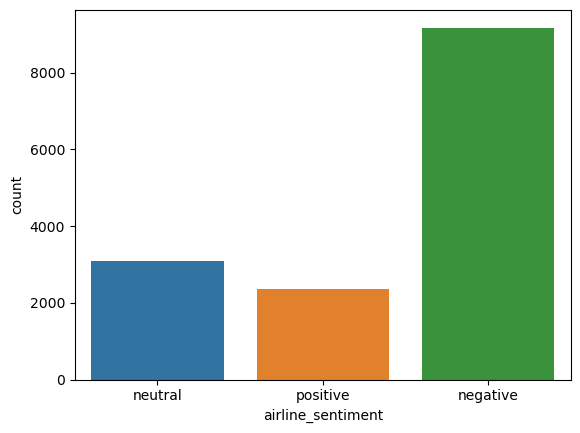

In [99]:
sns.countplot(data=data, x='airline_sentiment')

From the plots, we can see that the majority of the tweets fall under the negative class. We are going to balance the dataset before training the model because an unbalanced dataset can lead to inaccurate results.

Now, we are going to analyze the reasons behind negative sentiment tweets is by using a pie chart. This type of chart can help us identify if the majority of negative tweets are due to a specific reason. By visually representing the data, we can quickly extract useful insights and gain a better understanding of the overall sentiment towards the airline.

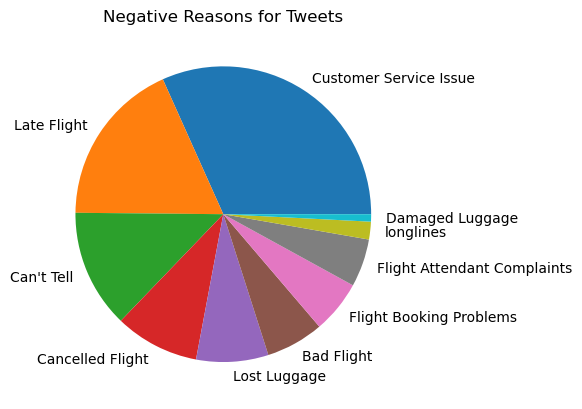

In [100]:
neg_reason_counts = data['negativereason'].value_counts()

plt.pie(neg_reason_counts, labels=neg_reason_counts.index)
plt.title('Negative Reasons for Tweets')
plt.show()

Based on the information presented in the pie chart, it is evident that the most common reason for negative tweets is related to customer service issues.

Now, we are going to find the total number of twwets for each airline in the dataset

In [101]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


<Axes: xlabel='airline', ylabel='count'>

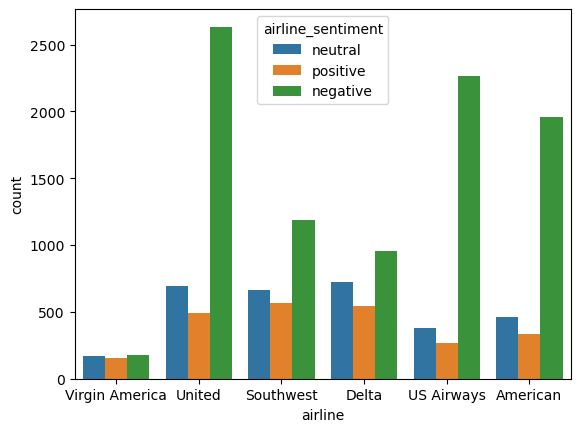

In [102]:
sns.countplot(data=data, x='airline', hue='airline_sentiment')

In [103]:
freq = data.groupby('negativereason').size()
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

# Data Preparation

Balance the dataset and split the data into training and test sets. 80% will be used for training and 20% will be used for testing. For our case we will not be including `neutral` sentiment just to make the task easier and understand Naive Bayes.

In [104]:
# Separate negative and positive sentiment tweets
neg_data = data[data['airline_sentiment'] == 'negative']
pos_data = data[data['airline_sentiment'] == 'positive']

In [105]:
# Sample an equal number of negative and positive tweets
num_samples = min(len(neg_data), len(pos_data))
neg_data = neg_data.sample(n=num_samples, random_state=42)
pos_data = pos_data.sample(n=num_samples, random_state=42)

In [106]:
# Concatenate the negative and positive sentiment tweets
balanced_data = pd.concat([neg_data, pos_data])

In [107]:
# Shuffle the rows
balanced_data = balanced_data.sample(frac=1, random_state=99)

In [108]:
print('Number of positive sentiment tweets: {}'.format(len(pos_data)))
print('Number of negative sentiment tweets: {}'.format(len(neg_data)))

Number of positive sentiment tweets: 2363
Number of negative sentiment tweets: 2363


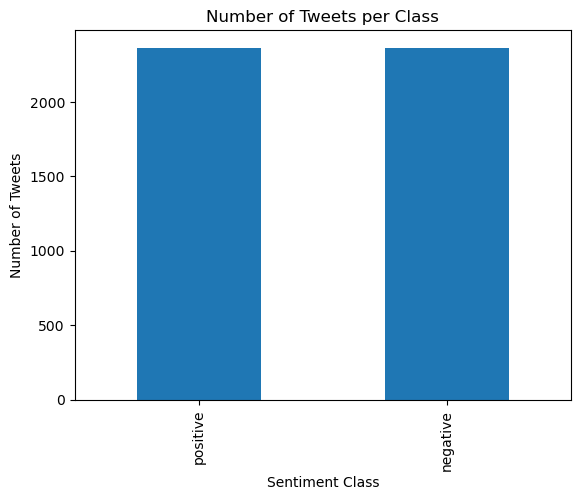

In [109]:
counts = balanced_data['airline_sentiment'].value_counts()
counts.plot(kind='bar')

plt.title('Number of Tweets per Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.show()

In [110]:
balanced_data.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  2363
negativereason_confidence       2033
airline                            0
airline_sentiment_gold          4713
name                               0
negativereason_gold             4718
retweet_count                      0
text                               0
tweet_coord                     4390
tweet_created                      0
tweet_location                  1452
user_timezone                   1481
dtype: int64

In [111]:
balanced_data = balanced_data.fillna(method='pad')

Some value can't be fill with pad method, so for that we are going to use bfill method for missing the rest missing values.

In [112]:
balanced_data = balanced_data.fillna(method='bfill')

In [113]:
balanced_data.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

# Splitting the Dataset

Split the dataset into training and test sets. 70% will be used for training and 20% will be used for testing.

In [114]:
# Split into features and target
X = balanced_data['text'].values.tolist()
y = balanced_data['airline_sentiment'].values.tolist()

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 99)

# Logistic Regression

## Pipeline with CountVectorizer

In natural language processing (NLP), raw text data cannot be directly fed into machine learning models. Models require numerical data as input. For this purpose, we are using a technique "CountVectorizer" which convert text data into a format, that machine learning algorithms can understand and process. 

How this technique works:

**Tokenization:** The first step is to break down the text into individual words or tokens. For example, the sentence "I love machine learning" would be tokenized into the list of words: ["I", "love", "machine", "learning"].

**Counting Tokens:** The CountVectorizer then counts the frequency of each token in each document (tweet in your case). It creates a vocabulary of all unique tokens present in the entire dataset.

**Creating a Document-Term Matrix:** It represents each document (tweet) as a row in a matrix and each unique token as a column. The value in each cell of the matrix is the count of how many times a token appears in a particular document.

In [116]:
# Create a pipeline with CountVectorizer and Logistic Regression
Logistic_Regrestion_Pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to a bag-of-words representation
    ('classifier', LogisticRegression())  # Apply Logistic Regression
])

In [117]:
Logistic_Regrestion_Pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

### Prediction

In [118]:
y_pred = Logistic_Regrestion_Pipeline.predict(X_test)

### Evalaution

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8765867418899859
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87       684
    positive       0.89      0.87      0.88       734

    accuracy                           0.88      1418
   macro avg       0.88      0.88      0.88      1418
weighted avg       0.88      0.88      0.88      1418



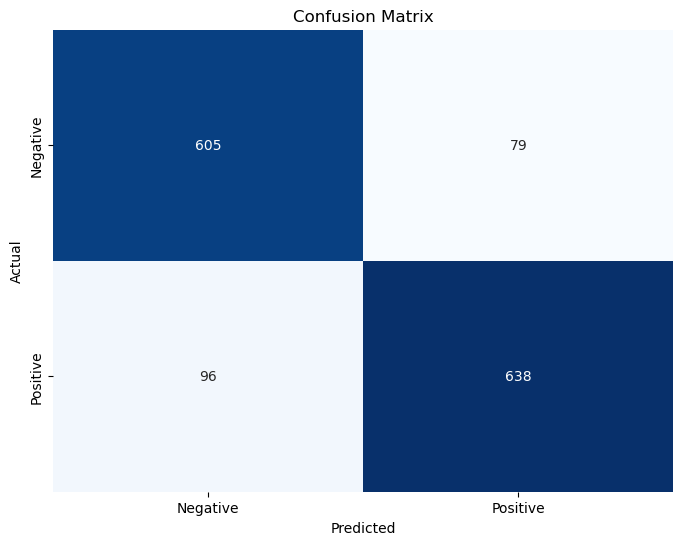

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

# Random Forest

In [121]:
Random_Forest_Pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [122]:
Random_Forest_Pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

### Prediction

In [123]:
y_pred = Random_Forest_Pipeline.predict(X_test)

### Evaluation

In [124]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8751763046544428
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87       684
    positive       0.90      0.86      0.88       734

    accuracy                           0.88      1418
   macro avg       0.88      0.88      0.88      1418
weighted avg       0.88      0.88      0.88      1418



([<matplotlib.axis.YTick at 0x134d09d4220>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

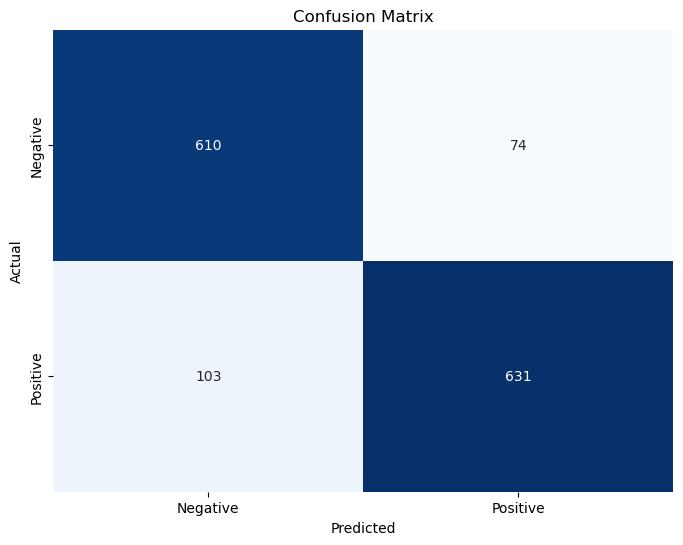

In [125]:
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Decision Tree

In [126]:
Decision_Tree_Pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

In [127]:
Decision_Tree_Pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', DecisionTreeClassifier())])

### Prediction

In [128]:
y_pred = Decision_Tree_Pipeline.predict(X_test)

### Evaluation

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.810296191819464
              precision    recall  f1-score   support

    negative       0.79      0.83      0.81       684
    positive       0.83      0.79      0.81       734

    accuracy                           0.81      1418
   macro avg       0.81      0.81      0.81      1418
weighted avg       0.81      0.81      0.81      1418



([<matplotlib.axis.YTick at 0x134d09fff70>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

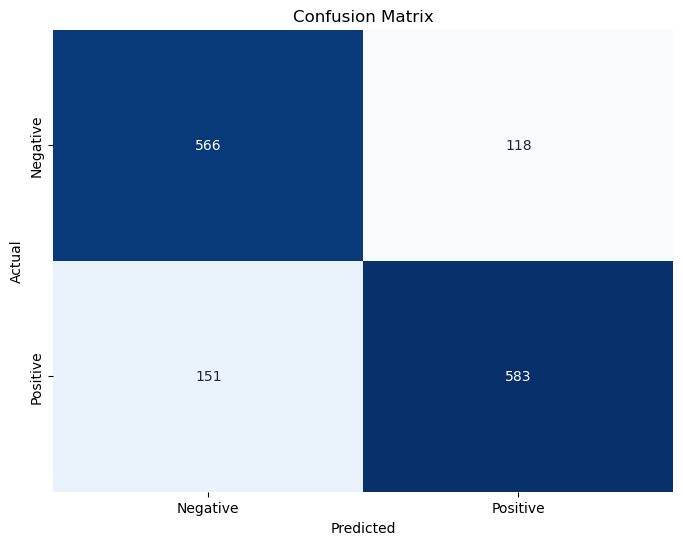

In [130]:
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Comparison

In [131]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [0.8765867418899859, 0.883638928067701, 0.8067700987306065]

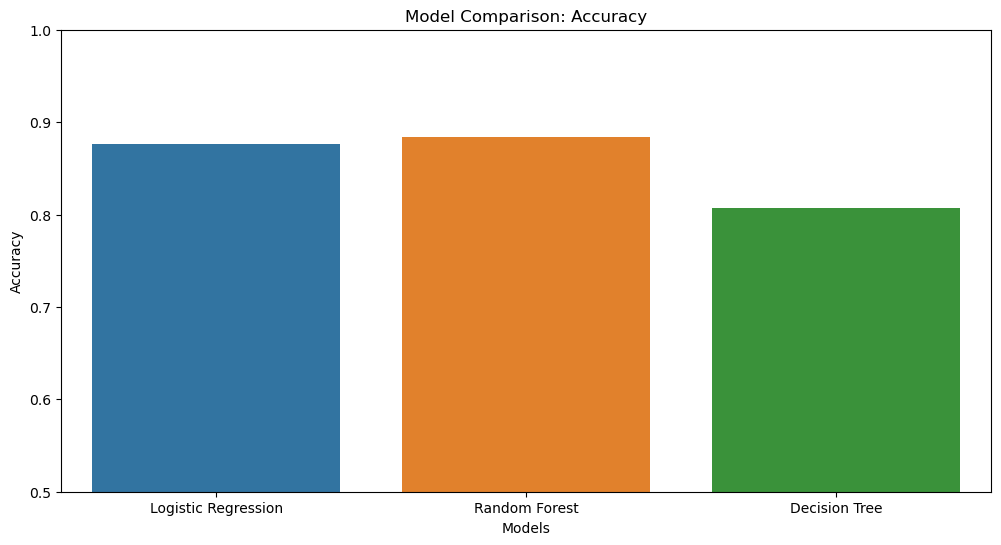

In [132]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()


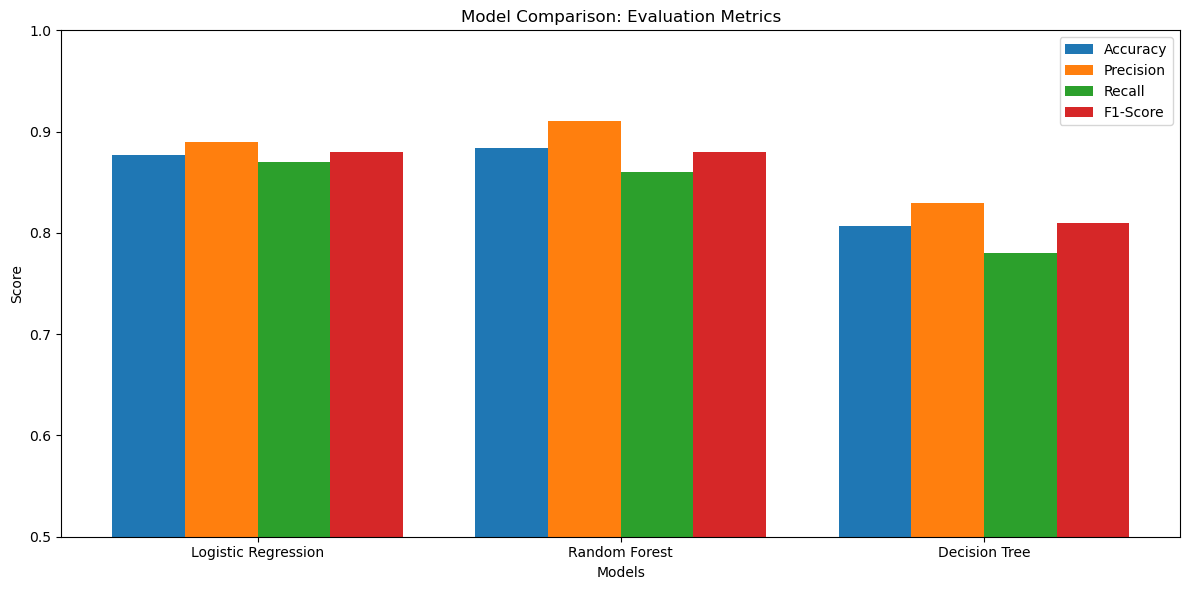

In [133]:
# Evaluation metrics for each model
accuracy_scores = [0.877, 0.884, 0.807]
precision_scores = [0.89, 0.91, 0.83]
recall_scores = [0.87, 0.86, 0.78]
f1_scores = [0.88, 0.88, 0.81]

# Create a grouped bar plot for evaluation metrics
plt.figure(figsize=(12, 6))

bar_width = 0.2
x_indexes = np.arange(len(models))

plt.bar(x_indexes, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(x_indexes + bar_width, precision_scores, width=bar_width, label='Precision')
plt.bar(x_indexes + 2 * bar_width, recall_scores, width=bar_width, label='Recall')
plt.bar(x_indexes + 3 * bar_width, f1_scores, width=bar_width, label='F1-Score')

plt.title('Model Comparison: Evaluation Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(x_indexes + 1.5 * bar_width, models)
plt.ylim(0.5, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion

Both Logistic Regression and Random Forest models have similar accuracy (around 0.88), indicating their ability to make accurate predictions.

Random Forest has the highest precision for the positive class, indicating its ability to correctly classify positive sentiment tweets.

Logistic Regression and Random Forest have higher recall for the positive class compared to the Decision Tree, suggesting that they can better capture positive sentiment instances.

Decision Tree has the lowest performance among the three models in terms of accuracy, precision, recall, and F1-score, indicating that it might not generalize as well as the other two models.

Overall, based on these evaluation metrics, the Random Forest model appears to perform slightly better than Logistic Regression and Decision Tree for this sentiment analysis task on this specific dataset.